In [2]:
# Section 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter




In [4]:
# Section 2: Load the Titanic Dataset
# Load the training data
train_data = pd.read_csv('C:/Users/KIIT/Desktop/data/train.csv')
# Load the test data
test_data = pd.read_csv('C:/Users/KIIT/Desktop/data/test.csv')

# Output: Display the first few rows of the training dataset
print("Training Data:")
train_data.head()




Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import pandas as pd

# Section 3: Data Cleaning and Preprocessing
# Map 'Sex' to numeric values in train and test data
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})

# Fill missing Age values with the mean for train and test data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

# One-hot encode 'Embarked' and drop unnecessary columns
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns from both datasets
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Output: Display the first few rows of the cleaned training dataset
print("Cleaned Training Data:")
print(train_data.head())

# Output: Display the first few rows of the cleaned test dataset
print("Cleaned Test Data:")
print(test_data.head())


Cleaned Training Data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False        True
4         0       3    1  35.0      0      0   8.0500       False        True
Cleaned Test Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    1  34.5      0      0   7.8292        True       False
1       3    0  47.0      1      0   7.0000       False        True
2       2    1  62.0      0      0   9.6875        True       False
3       3    1  27.0      0      0   8.6625       False        True
4       3    0  22.0      1      1  12.2875       False        True


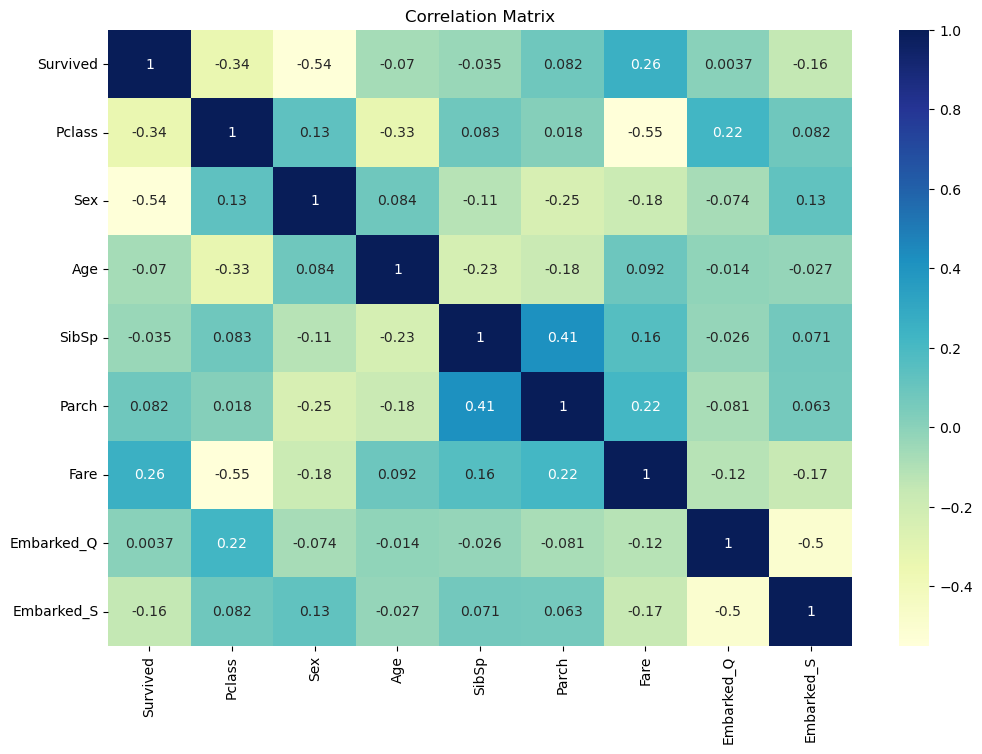

In [8]:
# Section 4: Correlation Analysis for Feature Selection
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

# Output: The correlation matrix will be displayed as a heatmap

# Drop less correlated features based on analysis in both training and test datasets
train_data.drop(columns=['SibSp', 'Age'], inplace=True)
test_data.drop(columns=['SibSp', 'Age'], inplace=True)

In [10]:
# Output: Display the updated training dataset after dropping columns
print("Updated Training Data after dropping less correlated features:")
print(train_data.head())

# Output: Display the updated test dataset after dropping columns
print("Updated Test Data after dropping less correlated features:")
print(test_data.head())

Updated Training Data after dropping less correlated features:
   Survived  Pclass  Sex  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1      0   7.2500       False        True
1         1       1    0      0  71.2833       False       False
2         1       3    0      0   7.9250       False        True
3         1       1    0      0  53.1000       False        True
4         0       3    1      0   8.0500       False        True
Updated Test Data after dropping less correlated features:
   Pclass  Sex  Parch     Fare  Embarked_Q  Embarked_S
0       3    1      0   7.8292        True       False
1       3    0      0   7.0000       False        True
2       2    1      0   9.6875        True       False
3       3    1      0   8.6625       False        True
4       3    0      1  12.2875       False        True


In [12]:
# Section 5: Prepare Train-Test Split
X_train = train_data.drop(['Survived'], axis=1).values
y_train = train_data['Survived'].values

# Prepare test data for predictions
X_test = test_data.values  # 

# Output: Display the shapes of the training and test datasets
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}")


Shape of X_train: (891, 6), y_train: (891,), X_test: (418, 6)


In [14]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes, counts = np.unique(y, return_counts=True)

        # If y is empty, return None (or some other default)
        if len(unique_classes) == 0:
            return None

        predicted_class = unique_classes[np.argmax(counts)]

        # Stopping conditions
        if (depth == self.max_depth) or (len(set(y)) == 1) or (n_samples == 0):
            return predicted_class

        feature_indices = np.arange(n_features)
        best_feature, best_threshold = self._best_split(X, y, feature_indices)

        # Split data
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        # Check if the splits are valid (not empty)
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            return predicted_class  # No valid split found, return the predicted class

        # Recursively build the left and right subtrees
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y, feature_indices):
        best_feature = None
        best_threshold = None
        best_gini = float('inf')

        for feature in feature_indices:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                # Fix the Gini calculation with correct left and right subsets
                gini = self._gini_index(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_index(self, left, right):
        total_samples = len(left) + len(right)
        if total_samples == 0:
            return 0

        gini_left = 1 - sum((np.sum(left == c) / len(left))**2 for c in np.unique(left)) if len(left) > 0 else 0
        gini_right = 1 - sum((np.sum(right == c) / len(right))**2 for c in np.unique(right)) if len(right) > 0 else 0

        return (len(left) / total_samples) * gini_left + (len(right) / total_samples) * gini_right

    def predict(self, X):
        return np.array([self._predict(sample, self.tree) for sample in X])

    def _predict(self, sample, tree):
        if not isinstance(tree, tuple):
            return tree

        feature, threshold, left, right = tree
        if sample[feature] < threshold:
            return self._predict(sample, left)
        else:
            return self._predict(sample, right)

# Output: Decision Tree class definition complete
print("Decision Tree class defined successfully.")


Decision Tree class defined successfully.


In [16]:
# Section 7: Train the Decision Tree Model
decision_tree = DecisionTree(max_depth=5)
decision_tree.fit(X_train, y_train)

# Output: Model training completed
print("Model training completed.")


Model training completed.


In [18]:
import numpy as np

def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix components
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print("                 Predicted Positive   Predicted Negative")
    print(f"Actual Positive     {true_positives}                  {false_negatives}")
    print(f"Actual Negative     {false_positives}                  {true_negatives}")
    print()
    
    # Calculate metrics
    accuracy = np.mean(y_true == y_pred)
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    # Print metrics
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1_score))


In [20]:
# Section 9: Predict and Evaluate on the Training Set
y_train_pred = decision_tree.predict(X_train)
calculate_metrics(y_train, y_train_pred)

# Output: Training metrics displayed


Confusion Matrix:
                 Predicted Positive   Predicted Negative
Actual Positive     233                  109
Actual Negative     39                  510

Accuracy: 83.39%
Precision: 0.86
Recall: 0.68
F1 Score: 0.76


In [22]:
# Section 10: Evaluate on Test Set
# If you have labels for the test data (for evaluation), you can do the following:
# Uncomment and modify the below lines based on your actual test data
# y_test = test_data['Survived'].values  # Assuming 'Survived' column exists
# y_test_pred = decision_tree.predict(X_test)
# calculate_metrics(y_test, y_test_pred)

# If the 'Survived' labels are not available, you can simply predict and save the results
y_test_pred = decision_tree.predict(X_test)
# Save predictions to a CSV file
predictions = pd.DataFrame({'Survived': y_test_pred})
predictions.to_csv('titanic_predictions.csv', index=False)

# Output: Predictions saved to 'titanic_predictions.csv'
print("Predictions saved to 'titanic_predictions.csv'.")


Predictions saved to 'titanic_predictions.csv'.
